<a href="https://colab.research.google.com/github/songdh1104/AIPYTHON/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%A0%84%EC%B2%98%EB%A6%AC_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## 한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

%config lnlineBackend.figure_format = 'retina'
!apt -qq -y install fonts-nanum

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (8,935 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126332 files and dire

Text(0.5, 1.0, '한글')

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44544 (\N{HANGUL SYLLABLE GEUL}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44544 (\N{HANGUL SYLLABLE GEUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


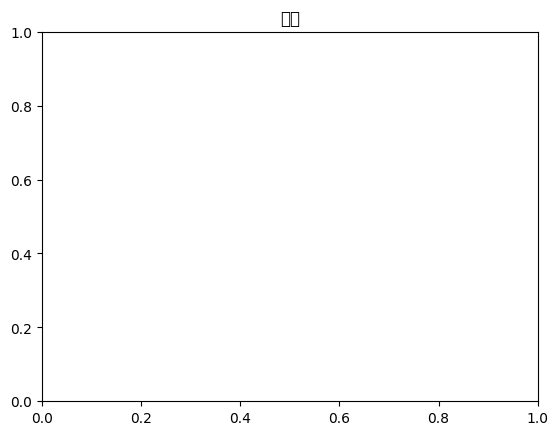

In [ ]:
## 런타임 다시 시작 후 진행
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

# 확인
plt.title('한글')



Text(0.5, 1.0, '한글')

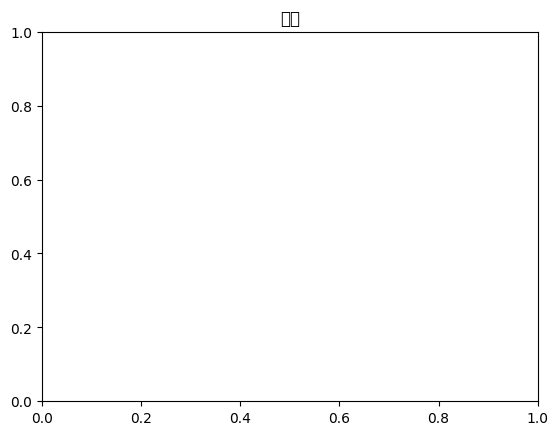

In [ ]:
## 런타임 다시 시작 후 진행
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

# 확인
plt.title('한글')


In [ ]:
#데이터 불러오기
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/창의적프로그래밍/data_raw.xlsx')
df

,출발지역,호출지,Memo1,목적지역,목적지,Memo2,호출지경도,호출지위도,목적지경도,목적지위도,요금,접수일시,배차일시,승차일시,하차일시
0,부산광역시 북구 덕천동,ㅎ덕천동 삼광교회,NaN,부산 사하구 다대동,ㅎ다대5지구몰운대210동,4번,492973,290634,488050,273006,8040,2020-01-01 00:00:37.293,2020-01-01 01:20:24.160,2020-01-01 01:39:39.000,2020-01-01 02:15:23.000
1,부산광역시 연제구 연산동,KEB하나은행 [연산동지점]후문,NaN,부산광역시 수영구 광안동,광안 쌍용예가디오션,/,498812,288015,501706,284638,2500,2020-01-01 02:35:03.687,2020-01-01 04:33:09.993,2020-01-01 05:03:42.000,2020-01-01 05:18:33.000
2,부산광역시 북구 만덕동,ㅎ만덕동원아파트102동,탑승인원2명,부산광역시 부산진구 양정동,ㅎ양정 부산고용복지플러스센터,NaN,494108,290599,498091,287066,2800,2020-01-01 06:33:43.930,2020-01-01 06:53:16.720,2020-01-01 07:07:33.000,2020-01-01 07:23:42.000
3,부산광역시 사하구 다대동,ㅅ다대5지구몰운대202동,NaN,부산광역시 사하구 당리동,ㅅ당리 양지지압원,NaN,488110,272794,489288,278612,3500,2020-01-01 07:32:38.917,2020-01-01 07:48:58.400,2020-01-01 08:20:24.000,2020-01-01 08:44:18.000
4,부산광역시 중구 중앙동,ㅅ중앙동 노블리안2 오피스텔 뒷편,NaN,부산광역시 서구 암남동,ㅅ송도 고신의료원,NaN,494713,278899,492848,276200,2100,2020-01-01 08:39:29.143,2020-01-01 08:42:08.673,2020-01-01 09:04:04.000,2020-01-01 09:19:50.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65694,부산광역시 중구 영주동,ㅎ영주동 영주약국,탑승인원1명,부산광역시 동구 범일동,ㅎ범일두산위브포세이돈아파트,NaN,494537,279731,497152,282440,2200,2022-07-31 17:52:40.557,2022-07-31 18:17:08.810,2022-07-31 18:34:01.000,2022-07-31 18:54:04.000
65695,부산광역시 동래구 사직동,ㅅ사직 한국전통지압원,기사메모:★★고객요청하시는 도로(방향)로 운행/보행안내시 동의구하고 손잡아주세요,부산광역시 연제구 거제동,ㅅ거제 유림아시아드타워 202동 3-4,NaN,496798,289069,497312,287588,1800,2022-07-31 18:36:05.107,2022-07-31 18:38:32.157,2022-07-31 19:01:04.000,2022-07-31 19:11:21.000
65696,부산광역시 부산진구 가야동,가야 세연정[가야점],NaN,부산광역시 남구 감만동,감만동 33-41[자택]큰도로변쪽 아지트[구.유진슈퍼],NaN,494298,284315,499231,281036,3200,2022-07-31 18:59:54.440,2022-07-31 19:04:07.050,2022-07-31 19:19:49.000,2022-07-31 19:44:51.000
65697,부산광역시 동래구 사직동,ㅎ사직북로5번길 44-1 메이웍,NaN,경상남도 김해시 외동,ㅎ(김해시)외동 1221-5,NaN,496596,289048,478167,292900,7740,2022-07-31 20:03:11.540,2022-07-31 20:07:21.340,2022-07-31 20:29:09.000,2022-07-31 21:19:01.000
